In [ ]:
####

In [3]:
import os
import zipfile

In [4]:
url = 'https://files.grouplens.org/datasets/movielens/ml-20m.zip'
filename = 'ml-20m.zip'

if not os.path.exists(filename):
    import urllib.request
    urllib.request.urlretrieve(url, filename)

with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall('.')

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the data

In [5]:
movieLen_df = pd.read_csv('ml-20m/ratings.csv')

In [6]:
movieLen_df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


### EDA

In [7]:
movieLen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 610.4 MB


In [8]:
# Getting a general idea of the dataset
with pd.option_context('display.float_format', '{:f}'.format):
    print(movieLen_df.describe())

               userId         movieId          rating         timestamp
count 20000263.000000 20000263.000000 20000263.000000   20000263.000000
mean     69045.872583     9041.567330        3.525529 1100917921.677118
std      40038.626653    19789.477445        1.051989  162169424.782724
min          1.000000        1.000000        0.500000  789652004.000000
25%      34395.000000      902.000000        3.000000  966797745.000000
50%      69141.000000     2167.000000        3.500000 1103555886.000000
75%     103637.000000     4770.000000        4.000000 1225642317.500000
max     138493.000000   131262.000000        5.000000 1427784002.000000


In [9]:
print(movieLen_df['userId'].nunique())
print(movieLen_df['movieId'].nunique())

138493
26744


In [10]:
#checking nulls
movieLen_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [11]:
# Group the ratings by movie ID and count the number of ratings for each movie
sum_movie_rating = (
    movieLen_df[["userId","movieId"]].groupby(["movieId"],as_index = False).count()
)

sum_movie_rating.rename(
    mapper = {"userId" : "Popularity"},
    axis = 1,
    inplace = True
)

In [12]:
# Group the movies by their popularity (number of ratings) and count the number of movies in each popularity bin
sum_movie_rating = sum_movie_rating.groupby("Popularity",as_index = False).count()

# Rename the "movieId" column to "counts" to reflect the number of movies in each popularity bin
sum_movie_rating.rename(
    mapper = {"movieId" : "counts"},
    axis = 1,
    inplace = True
)

# Calculate the base-10 logarithm of the movie popularity (number of ratings) and add it as a new column
sum_movie_rating["log_Item_Popularity"] = np.log10(sum_movie_rating["Popularity"])

# Display the first 5 rows of the preprocessed data
sum_movie_rating.head()

,Popularity,counts,log_Item_Popularity
0,1,3972,0.000000
1,2,2043,0.301030
2,3,1355,0.477121
3,4,1029,0.602060
4,5,826,0.698970


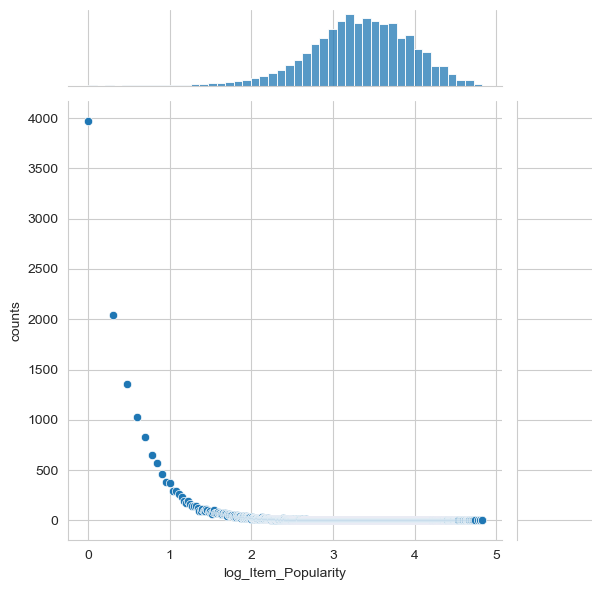

In [13]:
sns.set_style("whitegrid")
axe = sns.jointplot(x = "log_Item_Popularity",y = "counts",data = sum_movie_rating)



plt.savefig('movies_popularity.jpg', dpi=300, bbox_inches='tight')


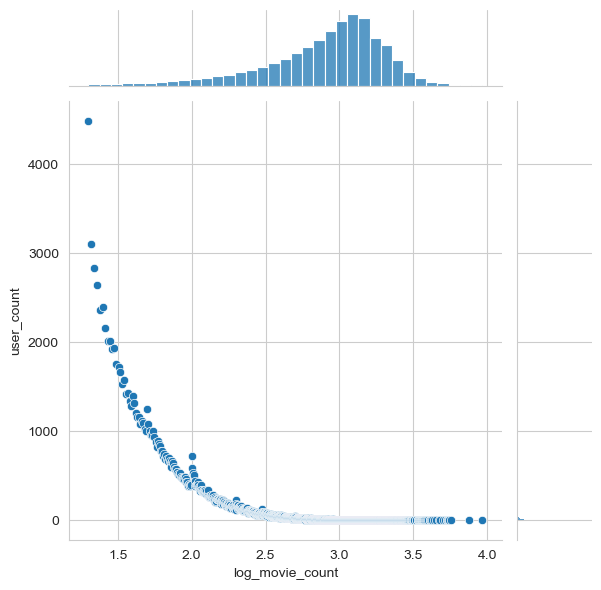

In [14]:
# Doing the same but with users
item_popularity = movieLen_df.groupby(["userId"],as_index = False).count()
item_popularity.rename(mapper = {"movieId" : "movie_count"},axis = 1,inplace = True)
item_popularity = item_popularity.groupby(["movie_count"],as_index = False).count()
item_popularity.rename(mapper = {"userId" : "user_count"},axis = 1,inplace = True)
item_popularity["log_movie_count"] = np.log10(item_popularity.movie_count)

sns.set_style("whitegrid")

sns.jointplot(data = item_popularity,x = "log_movie_count",y = "user_count")
plt.title("")

plt.savefig('user_activity.jpg', dpi=300, bbox_inches='tight')

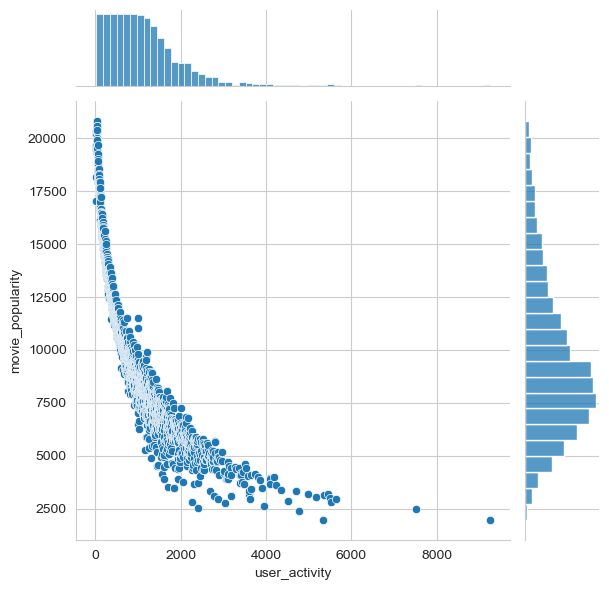

In [15]:
# Checking the relationship between how active users are in rating movies 
# and how popular the movies they rating are

user_activity = movieLen_df[["userId","movieId"]].groupby("userId").count()
user_activity.rename({"movieId" : "user_activity"},axis = 1,inplace = True)

movie_popularity = (movieLen_df[["userId","movieId"]].
                                groupby("movieId",as_index = False).count())
movie_popularity.rename({"userId" : "movie_popularity"},axis = 1,inplace = True)


combine = pd.merge(left = movieLen_df,right = user_activity,on = "userId")
combine = pd.merge(left = combine,right = movie_popularity,on = "movieId")

combine = combine.groupby(["user_activity"],as_index = False).mean()

sns.set_style("whitegrid")
sns.jointplot(data = combine,x = "user_activity",y = "movie_popularity")

plt.savefig('user_activity_movie_popularity.jpg', dpi=300, bbox_inches='tight')

* We can see a decreasing trend showing that those user that review more movies are generally reviwing less popular movies 
* We do not have nulls
* We have 138493 in continuous order but movie IDs are not continuos
* Rankings go from 0.5 to 5.0